# Reference space
1. Annotated 3D array (int)
2. Structure ontology

See documentation [here](https://allensdk.readthedocs.io/en/latest/_static/examples/nb/reference_space.html#Constructing-a-structure-tree)

In [1]:
import numpy as np
import pandas as pd
import nrrd
import json
import matplotlib.pyplot as plt

plt.rc('figure', dpi=200)

## Plot slice

In [2]:
ccf_data, meta = nrrd.read('../ccf/CCFv3_annotation_25.nrrd')
ccf_data.shape

(528, 320, 456)

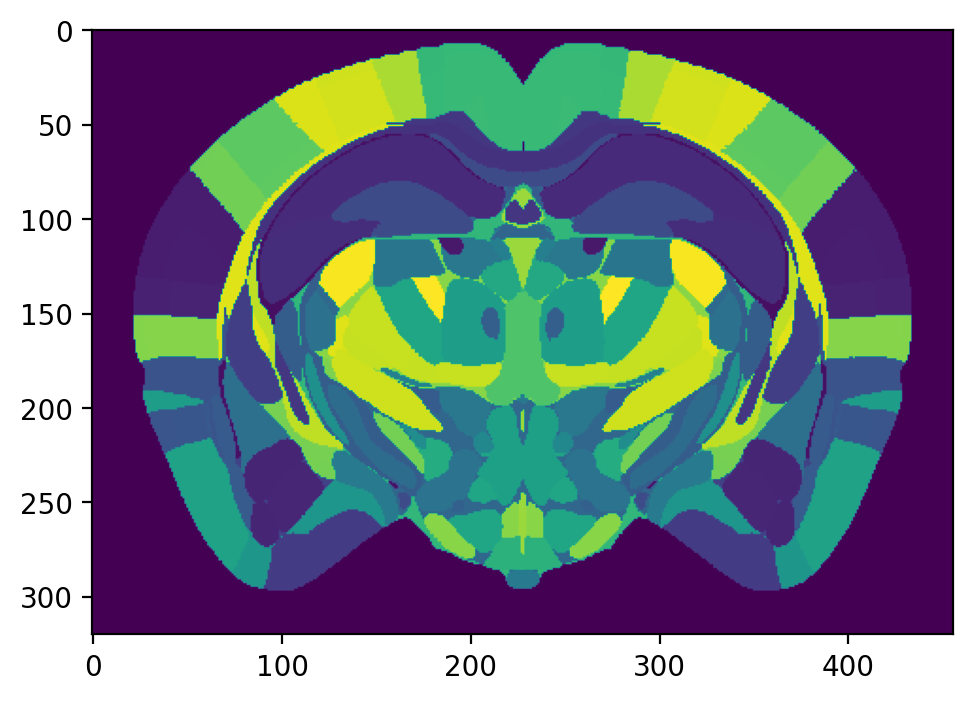

In [3]:
slice_data = ccf_data[300, :, :]
plt.imshow(slice_data)

In [4]:
slice_data[:, 100]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0, 1229, 1229, 1229, 1229, 1229, 1230, 1230,  972,  972,  972,
        972,  972,  972,  972,  972,  973,  973,  973,  973,  973,  973,
        973,  973,  973,  973,  974,  974,  974,  974,  974,  974,  974,
        974,  974,  974,  974,  975,  975,  975,  975,  975,  975,  975,
        975,  975,  975,  975,  976,  976, 1238, 1238, 1238, 1238,  190,
        190,  190,  190,  190,  190,  190,   55,   55,  161,  161,  161,
        161,  161,  161,  161,  161,  166,  166,  166,  166,  171,  171,
        171,  171,  171,  171,  171,  171,  171,  171,  171,  171,  171,
        171,  171,  171,  171,  171,  171,  171,  171,  171,  171,  171,
        171,  171,  171,  171,  171,  171,  171,  171,  171,  171,  171,
         55,   55,   55,   55,   55,  381,  381,  3

## Trun number into names and colors

In [7]:
with open('../StructureTree/id_to_acronym.json') as f:
    id_to_acronym = {int(k): v for k, v in json.load(f).items()}
with open('../StructureTree/id_to_descendant_ids.json') as f:
    id_to_descendant_ids = {int(k): v for k, v in json.load(f).items()}
    
acronym_to_id = {v: k for k, v in id_to_acronym.items()}

In [10]:
acronym_to_id['MOp']

985

In [11]:
id_to_descendant_ids[acronym_to_id['MOp']]

[985, 320, 943, 648, 844, 882]

In [12]:
[id_to_acronym[i] for i in id_to_descendant_ids[acronym_to_id['MOp']]]

['MOp', 'MOp1', 'MOp2/3', 'MOp5', 'MOp6a', 'MOp6b']

In [27]:
mop = np.zeros_like(ccf_data)

for child_id in id_to_descendant_ids[acronym_to_id['MOp']]:
    _data = ccf_data == child_id
    mop += _data

In [31]:
mop = mop.astype(bool) * ccf_data

## Make a dissection slice mask

In [32]:
mask = np.zeros_like(ccf_data)
# only generate half, the other half can be automatically generated once manually modified
mask[300:324, :, 228:] = 1
mask = mask.astype(bool)

In [33]:
slice_ccf = ccf_data * mask
slice_ccf.shape

(528, 320, 456)

In [34]:
nrrd.write('sliced_ccf.nrrd', slice_ccf, header=meta)